<a href="https://colab.research.google.com/github/michaeldouglas/mba_IA_ML-proj_int-grupo_b/blob/main/Python/Trabalho_deep_learning_reinforcement_learning/Heart_Disease_exercicio_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exercício #1_1

Utilizando o dataset Heart Disease UCI (disponível no repositório da disciplina e em https://www.kaggle.com/ronitf/heart-disease-uci) configure uma Rede Neural MLP que classifique as amostras em saudáveis (coluna target =0) ou não.

### Definição do problema

Este banco de dados contém 76 atributos, mas todos os experimentos publicados referem-se ao uso de um subconjunto de 14 deles. Em particular, o banco de dados de Cleveland é o único que foi usado por pesquisadores de ML até hoje.

### Informações dos atributos

1.   Idade
2.   Sexo
3.   Tipo de dor no peito
4.   Pressão arterial em repouso
5.   Colesterol sérico
6.   Açúcar no sangue em jejum 
7.   Resultados eletrocardiográficos em repouso
8.   Frequência cardíaca máxima alcançada
9.   Angina induzida por exercício
10.  Depressão do ST induzida pelo exercício
11.  A inclinação do pico do segmento ST
12.  Número de vasos principais
13.  Tal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
14.  Variável target



In [1]:
#@title importação das bibliotecas

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
dataset = pd.read_csv('heart.csv')

### Verificação de dados nulos

Aqui nós vamos verificar os dados nulos do nosso modelo, além disso colocamos o resultado em um DataFrame para exibir o total encontrado X a proporção de valores nulos do nosso modelo.

In [3]:
dataset.isnull().mean(axis=1).loc[:10]

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
dtype: float64

In [4]:
dataset.isnull() # Aqui verificamos o total de null na base se existir
dataset.isnull().sum()/len(dataset) # Aqui obtemos a proporção de null se existir

# Criamos um novo DataFrame para verificar o total e a proporção de null na base
pd.DataFrame(zip(dataset.isnull().sum(),dataset.isnull().sum()/len(dataset)), columns=['Count', 'Proportion'], index=dataset.columns)

,Count,Proportion
age,0,0.0
sex,0,0.0
cp,0,0.0
trestbps,0,0.0
chol,0,0.0
fbs,0,0.0
restecg,0,0.0
thalach,0,0.0
exang,0,0.0
oldpeak,0,0.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Observações finais

*   Não contém valores nulos
*   O número total de observações é de 303
*   Os tipos com exceção do oldpeak são do tipo int64
*   No final acreditamos que os dados estão bons para separar em treino e testes sem nenhuma transformação ou alteração 

### Separação dos dados para treino e teste

A seguir separamos os dados para treino e testes e também já separamos nossa variávle target.

In [7]:
X = dataset.drop(['target'], axis=1)
y = dataset['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
#@title Transformação dos dados para escalar 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
#@title Configuração da nossa rede neural MLP

model = Sequential()
model.add(Dense(16, activation='relu', input_dim=13))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
#@title Compilação do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
#@title Treino da rede

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 1s 30ms/step - loss: 0.7090 - accuracy: 0.5620 - val_loss: 0.6123 - val_accuracy: 0.7213
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6721 - accuracy: 0.5702 - val_loss: 0.5893 - val_accuracy: 0.7213
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6414 - accuracy: 0.5826 - val_loss: 0.5715 - val_accuracy: 0.7049
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6149 - accuracy: 0.6281 - val_loss: 0.5559 - val_accuracy: 0.7049
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5895 - accuracy: 0.6488 - val_loss: 0.5430 - val_accuracy: 0.7049
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5696 - accuracy: 0.6901 - val_loss: 0.5317 - val_accuracy: 0.7049
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5506 - accuracy: 0.6983 - val_loss: 0.5225 - val_accuracy: 0.7049
Epoch 8/100
8/8 [=========

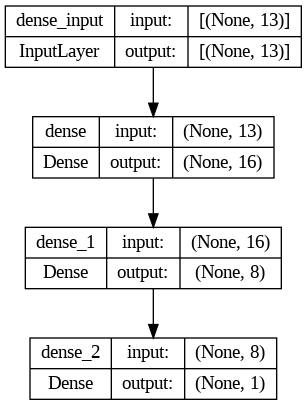

In [13]:
#@title Plot das camadas
plot_model(model, to_file='heart.png', show_shapes=True, show_layer_names=True)

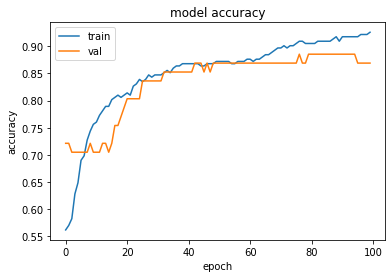

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
#@title Acurácia do nosso modelo

score = model.evaluate(X_test, y_test, verbose=0)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))


accuracy: 86.89%


In [16]:
#@title Teste de predição
y_pred_out = model.predict(X_test)

2/2 [==============================] - 0s 10ms/step


In [17]:
y_pred_out

array([[1.1345128e-02],
       [8.6790538e-01],
       [7.9119205e-01],
       [5.4075313e-03],
       [1.2629186e-01],
       [1.3779300e-01],
       [1.4324287e-02],
       [4.9449351e-02],
       [2.1834217e-04],
       [2.5824953e-03],
       [8.3873856e-01],
       [9.8368961e-01],
       [2.7750783e-02],
       [8.7387979e-01],
       [9.9713993e-01],
       [6.6670054e-01],
       [5.9750907e-02],
       [8.0946803e-01],
       [1.8377688e-02],
       [2.3652746e-01],
       [9.4704443e-01],
       [7.8168057e-02],
       [2.4896920e-01],
       [2.2815576e-01],
       [9.2261231e-01],
       [5.2021992e-01],
       [6.1716527e-02],
       [1.4210133e-01],
       [9.9733377e-01],
       [6.6322458e-01],
       [8.1293529e-01],
       [3.8720055e-03],
       [9.9434948e-01],
       [8.2293493e-01],
       [9.9246520e-01],
       [1.9442263e-01],
       [7.3184140e-02],
       [8.3360016e-01],
       [4.0440135e-02],
       [3.0158110e-02],
       [9.2612368e-01],
       [9.101872

In [18]:
y_pred_out > 0.5

array([[False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [19]:
y_pred_classes = (y_pred_out > 0.5).astype(int) 
y_pred_classes

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1]])

### Considerações finais

O nosso modelo chegou em uma acurácia de 96%. Isso fornece um bom alvo para classificar amostras de doenças cardíacas dos pacientes da base.